In [26]:
import os
files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
print(files_path)

In [24]:
diretorio, arquivo = path, filename = os.path.split(files_path[0])
print(arquivo)

Beach1.jpg


In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
#print(files_path)




def distancia(a, b):
    
    M = len(a)
    soma = 0
    
    for i in range(M):
        soma = soma + ((a[i]-b[i])**2)
        
    return np.sqrt(soma)




def histograma(img):
    
    WB = np.zeros(256)
    WG = np.zeros(256)
    WR = np.zeros(256)
    
    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]
    
    
    linhas, colunas, cores = img.shape
    
    #gerando valores do histograma
    for i in range(linhas):
        for j in range(colunas):
            WB[img[i,j]] = WB[img[i,j]] + 1
            WG[img[i,j]] = WG[img[i,j]] + 1
            WR[img[i,j]] = WR[img[i,j]] + 1
    
    #normalizando valores para pegar histogramas idependente da escala da imagem tendo valores entre 0 e 1
    for i in range(256):
        WB[i] = WB[i]/(linhas*colunas)
        WG[i] = WG[i]/(linhas*colunas)
        WR[i] = WR[i]/(linhas*colunas)
            
    return np.append(np.append(WB,WG),WR)





img = cv2.imread('Beach3.jpg')
hist_consulta = histograma(img)
d = []



for i in files_path:
    direct, arq = os.path.split(i)
    imagem = cv2.imread(arq)
    hist = histograma(imagem)
    d.append((distancia(hist_consulta, hist),arq))
    

print(sorted(d))



[(0.0, 'Beach3.jpg'), (0.0056497096031385835, 'Beach3inv.jpg'), (0.22403164659806377, 'Buildings3.jpg'), (0.22409888249568438, 'Buildings3inv.jpg'), (0.30910412818380234, 'Beach1inv.jpg'), (0.31039619188927864, 'Beach1.jpg'), (0.3542248459554917, 'Buses9inv.jpg'), (0.3566272798035075, 'Buses9.jpg'), (0.3641161570758045, 'Buildings2inv.jpg'), (0.36557963358471124, 'Buildings2.jpg'), (0.36739467379972235, 'Buses10.jpg'), (0.36799880702778415, 'Buses10inv.jpg'), (0.39680406878049596, 'Beach2inv.jpg'), (0.3969371192450338, 'Beach2.jpg'), (0.4015809350074297, 'Buildings1inv.jpg'), (0.40282704321345125, 'Buildings1.jpg'), (0.4089831928945352, 'Mountains53inv.jpg'), (0.40899153330907534, 'Mountains53.jpg'), (0.43132715256375304, 'Flowers2inv.jpg'), (0.4348541054627452, 'Flowers2.jpg'), (0.4422015354846182, 'Buses3inv.jpg'), (0.44790542296410474, 'Buses3.jpg'), (0.45389915898212485, 'Mountains52inv.jpg'), (0.45425310511709643, 'Mountains52.jpg'), (0.4898392606754624, 'Horses15.jpg'), (0.489846

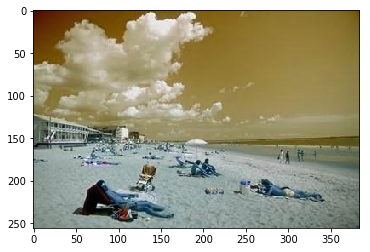

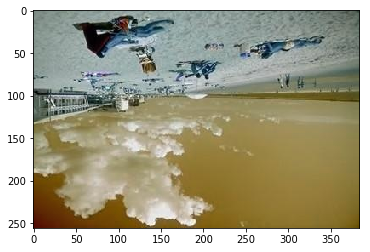

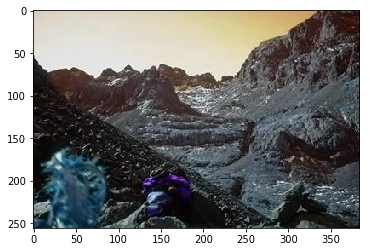

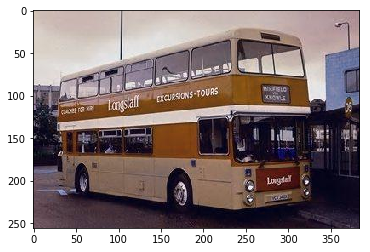

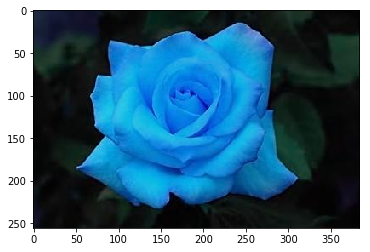

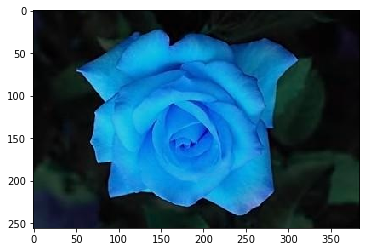

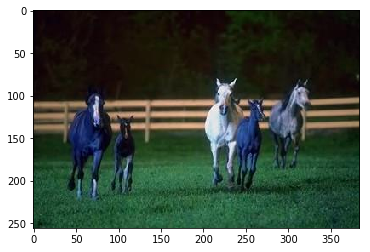

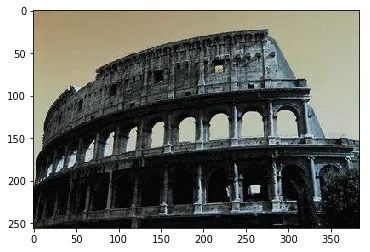

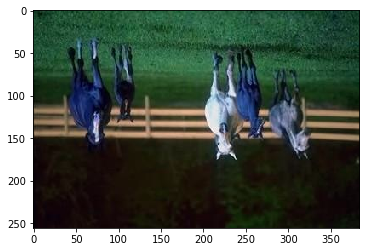

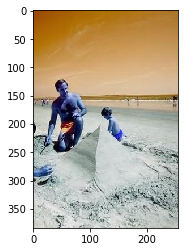

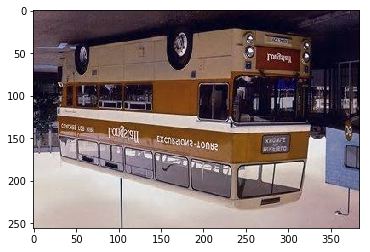

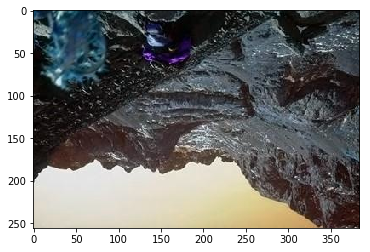

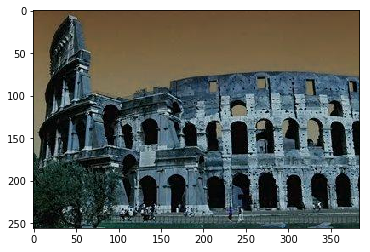

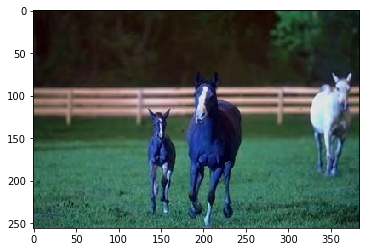

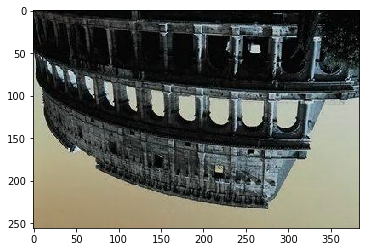

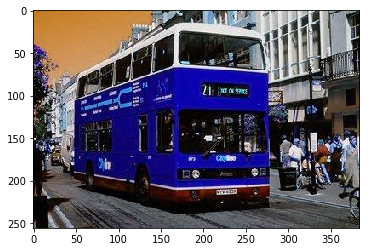

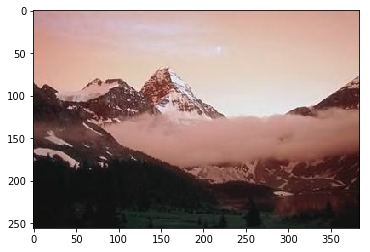

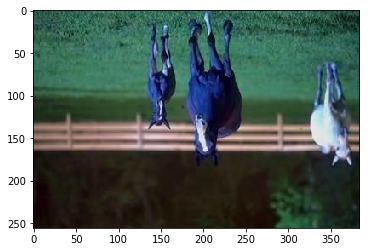

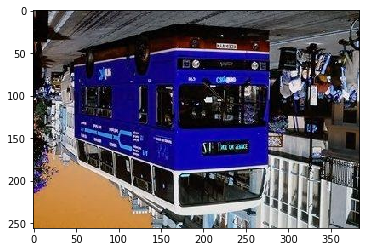

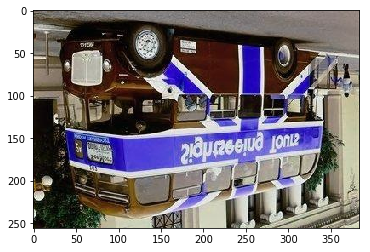

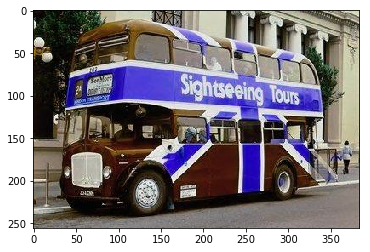

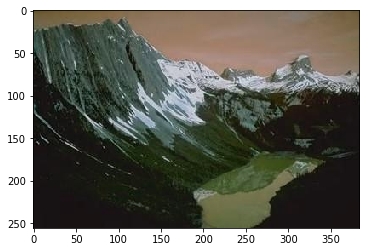

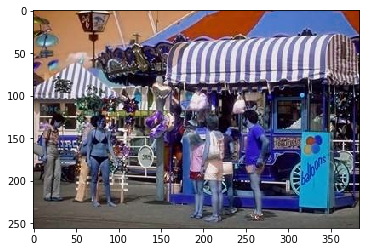

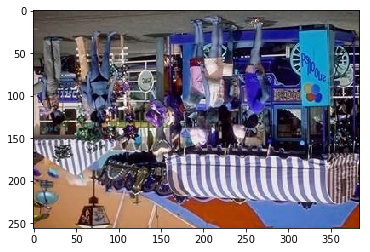

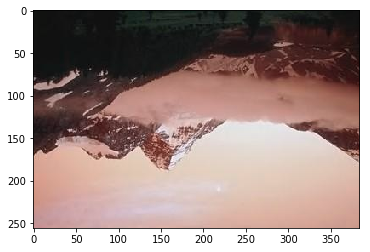

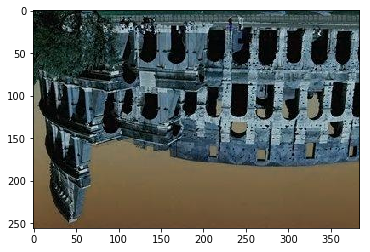

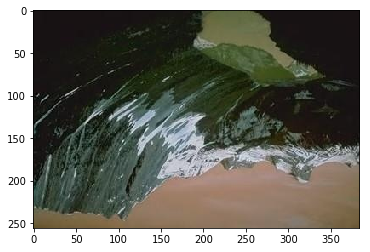

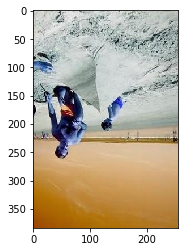

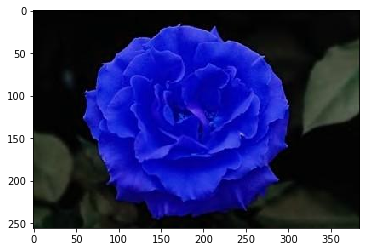

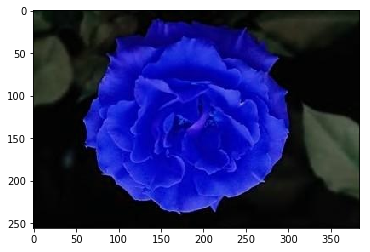

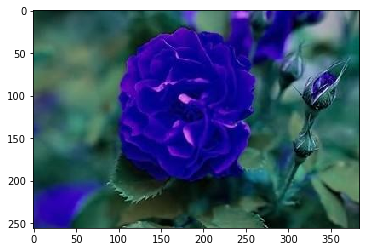

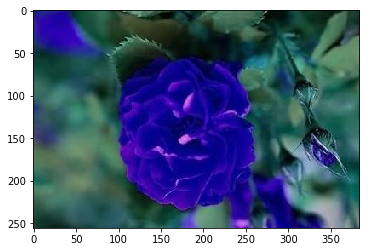

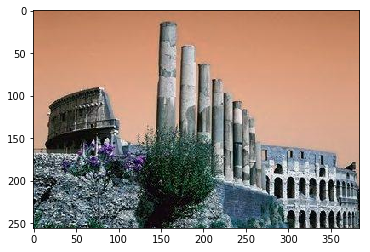

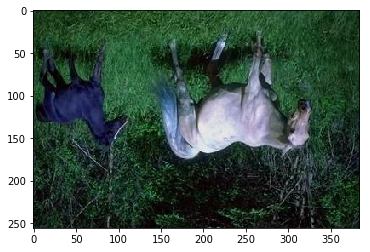

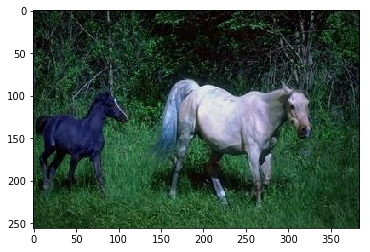

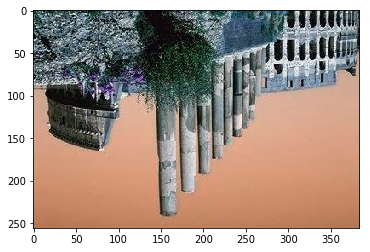

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]




#fazendo o histograma das imagens
def hist_colorido(img):
    WB = np.zeros(256)
    WG = np.zeros(256)
    WR = np.zeros(256)
    
    lin, col, c = img.shape
    
    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]
    
    for i in range(lin):
        for j in range(col):
            WB[B[i,j]] +=1
            WG[G[i,j]] +=1
            WR[R[i,j]] +=1
            
    for i in range(256):
        WB[i] = WB[i]/(lin*col) #normalização
        WG[i] = WG[i]/(lin*col) #normalização
        WR[i] = WR[i]/(lin*col) #normalização
    return np.append(np.append(WB,WG),WR)





def hist_cinza(img):
    W = np.zeros(256)
    
    lin, col = img.shape
    
    
    for i in range(lin):
        for j in range(col):
            W[img[i,j]] = W[img[i,j]] + 1
            
    for i in range(256):
        W[i] = W[i]/(lin*col) #normalização
    return W





def dist(hist_a,hist_b):#distancia euclidiana
    M = len(hist_a)
    soma = 0
    for i in range(M):
        soma += (hist_a[i]-hist_b[i])**2
    return np.sqrt(soma)









def lpb(img):
    
    linhas, colunas = img.shape
    img2 = np.zeros((linhas, colunas), dtype=int)
    
    
    for i in range (1, linhas -1):
        for j in range (1, colunas -1):
            A = img[i-1, j]
            B = img[i-1, j+1]
            C = img[i, j+1]
            D = img[i+1, j+1]
            E = img[i+1, j]
            F = img[i+1, j-1]
            G = img[i, j-1]
            H = img[i-1, j-1]
            Centro = img[i,j]
            
            soma = 0
            
            if(A > Centro):
                soma += (2**7)
            if(B > Centro):
                soma += (2**6)
            if(C > Centro):
                soma += (2**5)
            if(D > Centro):
                soma += (2**4)
            if(E > Centro):
                soma += (2**3)
            if(F > Centro):
                soma += (2**2)
            if(G > Centro):
                soma += (2**1)
            if(H > Centro):
                soma += (2**0)
                
            
            img2[i,j] = soma
            
    
    return img2











# COMPARANDO HISTOGRAMAS
# img_consulta = cv2.imread('Beach3.jpg')
# hist_consulta = hist_colorido(img_consulta)
# hist_dist = []

# for i in files_path:
#     direct, arq = os.path.split(i)
#     imagem = cv2.imread(arq)
#     img_hist = hist(imagem)
#     hist_dist.append((dist(hist_consulta, img_hist),arq))
    
# print(sorted(hist_dist))



# COMPARANDO HISTOGRAMAS LPB
img_consulta = cv2.imread('Beach3.jpg',0)
img_consulta = lpb(img_consulta)
hist_consulta = hist_cinza(img_consulta)
hist_dist = []


for i in files_path:
    direct, arq = os.path.split(i)
    imagem = cv2.imread(arq,0)
    imagem = lpb(imagem)
    img_hist = hist_cinza(imagem)
    hist_dist.append((dist(hist_consulta, img_hist),arq))
    
e = sorted(hist_dist)

# for i in e:
#     img = cv2.imread(i[1])
#     plt.imshow(img)
#     plt.show()



In [12]:
## SOBEL - DETECTOR DE CONTORNO
## METODO CANNY (MELHOR DETECTOR DE BORDAS)
## LBP - LOCAL BINARY PATTERNS - RECONHECIMENTO DE TEXTURA